In [1]:
!pip install datasets Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
!wget -c https://huggingface.co/datasets/liuhaotian/LLaVA-Instruct-150K/resolve/main/llava_instruct_150k.json

--2024-09-26 13:59:00--  https://huggingface.co/datasets/liuhaotian/LLaVA-Instruct-150K/resolve/main/llava_instruct_150k.json
Resolving huggingface.co (huggingface.co)... 54.230.71.56, 54.230.71.103, 54.230.71.28, ...
Connecting to huggingface.co (huggingface.co)|54.230.71.56|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/4d/41/4d41ea1e2709f0e68e9e361e4218192b9620c5a3f2cb8055bc625942b6cd3039/6b68bc5ca2bfd8a71119af0e8454929668ccda6a334955ccc95d114fc8d082fa?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27llava_instruct_150k.json%3B+filename%3D%22llava_instruct_150k.json%22%3B&response-content-type=application%2Fjson&Expires=1727618340&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNzYxODM0MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy80ZC80MS80ZDQxZWExZTI3MDlmMGU2OGU5ZTM2MWU0MjE4MTkyYjk2MjBjNWEzZjJjYjgwNTViYzYyNTk0MmI2Y2QzMDM5LzZiNjhiYzVjYTJiZmQ4YTcxMTE5YWYwZT

In [3]:
!wget -c http://images.cocodataset.org/zips/train2017.zip
!unzip train2017.zip -d coco/

Streaming output truncated to the last 5000 lines.
 extracting: coco/train2017/000000259556.jpg  
 extracting: coco/train2017/000000381931.jpg  
 extracting: coco/train2017/000000569592.jpg  
 extracting: coco/train2017/000000229396.jpg  
 extracting: coco/train2017/000000488990.jpg  
 extracting: coco/train2017/000000348684.jpg  
 extracting: coco/train2017/000000234031.jpg  
 extracting: coco/train2017/000000563584.jpg  
 extracting: coco/train2017/000000276069.jpg  
 extracting: coco/train2017/000000401194.jpg  
 extracting: coco/train2017/000000502089.jpg  
 extracting: coco/train2017/000000192183.jpg  
 extracting: coco/train2017/000000425127.jpg  
 extracting: coco/train2017/000000126766.jpg  
 extracting: coco/train2017/000000324161.jpg  
 extracting: coco/train2017/000000452746.jpg  
 extracting: coco/train2017/000000423782.jpg  
 extracting: coco/train2017/000000546343.jpg  
 extracting: coco/train2017/000000249290.jpg  
 extracting: coco/train2017/000000025529.jpg  
 extracti

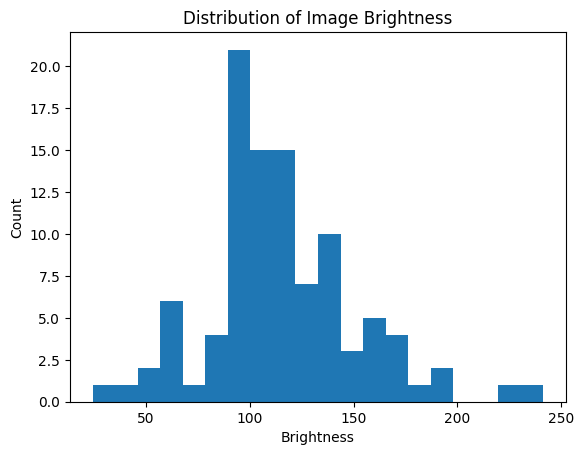

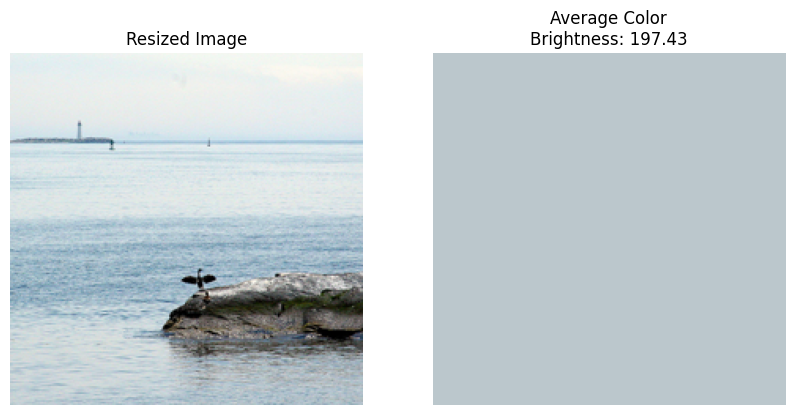

In [7]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img_array = np.array(img)

    # Resize to a standard size
    img_resized = img.resize((224, 224))

    # Calculate average color
    avg_color = np.mean(img_array, axis=(0, 1))

    # Calculate brightness
    brightness = np.mean(img_array)

    return img_resized, avg_color, brightness

def analyze_images(data_dir):
    image_dir = os.path.join(data_dir, 'train2017')
    brightnesses = []

    for image_file in os.listdir(image_dir)[:100]:  # Analyze first 100 images
        image_path = os.path.join(image_dir, image_file)
        _, _, brightness = process_image(image_path)
        brightnesses.append(brightness)

    plt.hist(brightnesses, bins=20)
    plt.title('Distribution of Image Brightness')
    plt.xlabel('Brightness')
    plt.ylabel('Count')
    plt.show()

# Usage
data_dir = 'coco'  # Update this to your data directory
analyze_images(data_dir)

# Process and display a single image
sample_image_path = os.path.join(data_dir, 'train2017', os.listdir(os.path.join(data_dir, 'train2017'))[0])
img_resized, avg_color, brightness = process_image(sample_image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_resized)
plt.title('Resized Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow([[avg_color / 255]])
plt.title(f'Average Color\nBrightness: {brightness:.2f}')
plt.axis('off')

plt.show()